In [2]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
df=pd.read_csv(r"C:\Users\LENOVO\Downloads\voice.csv")
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [4]:
df.shape

(3168, 21)

In [5]:
col_names = df.columns
col_names

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [6]:
df['label'].value_counts()

male      1584
female    1584
Name: label, dtype: int64

In [7]:


df['label'].replace('male',1,inplace=True)
df['label'].replace('female',0,inplace=True)
df.head()



,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   int6

In [9]:
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [10]:
round(df.describe(),2)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
count,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,...,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.0
mean,0.18,0.06,0.19,0.14,0.22,0.08,3.14,36.57,0.90,0.41,...,0.18,0.14,0.04,0.26,0.83,0.05,5.05,4.99,0.17,0.5
std,0.03,0.02,0.04,0.05,0.02,0.04,4.24,134.93,0.04,0.18,...,0.03,0.03,0.02,0.03,0.53,0.06,3.52,3.52,0.12,0.5
min,0.04,0.02,0.01,0.00,0.04,0.01,0.14,2.07,0.74,0.04,...,0.04,0.06,0.01,0.10,0.01,0.00,0.01,0.00,0.00,0.0
25%,0.16,0.04,0.17,0.11,0.21,0.04,1.65,5.67,0.86,0.26,...,0.16,0.12,0.02,0.25,0.42,0.01,2.07,2.04,0.10,0.0
50%,0.18,0.06,0.19,0.14,0.23,0.09,2.20,8.32,0.90,0.40,...,0.18,0.14,0.05,0.27,0.77,0.02,4.99,4.95,0.14,0.5
75%,0.20,0.07,0.21,0.18,0.24,0.11,2.93,13.65,0.93,0.53,...,0.20,0.17,0.05,0.28,1.18,0.07,7.01,6.99,0.21,1.0
max,0.25,0.12,0.26,0.25,0.27,0.25,34.73,1309.61,0.98,0.84,...,0.25,0.24,0.20,0.28,2.96,0.46,21.87,21.84,0.93,1.0


In [11]:
X = df.drop(['label'], axis=1)
y = df['label']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [13]:


X_train.head()



,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
2311,0.215536,0.039201,0.207473,0.193846,0.246154,0.052308,2.137455,7.951889,0.857409,0.211434,0.193846,0.215536,0.174002,0.047856,0.274286,1.182398,0.023438,9.937500,9.914062,0.044866
349,0.150899,0.062383,0.129451,0.099751,0.203394,0.103643,2.689374,12.289471,0.921978,0.510190,0.095655,0.150899,0.101953,0.051546,0.204082,0.809617,0.097656,3.940430,3.842773,0.350911
989,0.188229,0.062654,0.159817,0.132968,0.254003,0.121035,1.870762,6.261814,0.874688,0.286869,0.141065,0.188229,0.131446,0.047291,0.277457,1.801758,0.023438,6.890625,6.867188,0.152575
2100,0.190074,0.033921,0.193308,0.169888,0.213233,0.043346,2.162641,7.631533,0.846709,0.237891,0.168839,0.190074,0.170972,0.015779,0.246154,0.434211,0.054688,4.828125,4.773438,0.115021
1118,0.183465,0.054442,0.173265,0.136410,0.239795,0.103385,1.615562,5.302011,0.898586,0.342237,0.126359,0.183465,0.134925,0.047714,0.277457,0.782012,0.023438,3.281250,3.257812,0.099583


In [14]:
cols = X_train.columns

In [15]:


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])



In [16]:


# instantiate classifier with default hyperparameters
model=SVC() 

# fit classifier to training set
model.fit(X_train,y_train)

# make predictions on test set
y_pred_test=model.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))



Model accuracy score with default hyperparameters: 0.9842


In [17]:
# instantiate classifier with rbf kernel and C=100
svc=SVC(C=100.0) 

# fit classifier to training set
svc.fit(X_train,y_train)

# make predictions on test set
y_pred=svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.9795


In [18]:
# instantiate classifier with rbf kernel and C=100
svc=SVC(C=100.0) 

# fit classifier to training set
svc.fit(X_train,y_train)

# make predictions on test set
y_pred=svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.9795


In [19]:
# instantiate classifier with linear kernel and C=1.0
linear_svc=SVC(kernel='linear', C=1.0) 

# fit classifier to training set
linear_svc.fit(X_train,y_train)

# make predictions on test set
y_pred_test=linear_svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel and C=1.0 : 0.9732


In [20]:
# instantiate classifier with linear kernel and C=100.0
linear_svc100=SVC(kernel='linear', C=100.0) 

# fit classifier to training set
linear_svc100.fit(X_train, y_train)

# make predictions on test set
y_pred=linear_svc100.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=100.0 : 0.9763


In [21]:
# instantiate classifier with linear kernel and C=1000.0
linear_svc1000=SVC(kernel='linear', C=1000.0) 

# fit classifier to training set
linear_svc1000.fit(X_train, y_train)

# make predictions on test set
y_pred=linear_svc1000.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=1000.0 : 0.9763


In [22]:
# instantiate classifier with polynomial kernel and C=1.0
poly_svc=SVC(kernel='poly', C=1.0) 

# fit classifier to training set
poly_svc.fit(X_train,y_train)

# make predictions on test set
y_pred=poly_svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.9590


In [23]:
# instantiate classifier with polynomial kernel and C=100.0
poly_svc100=SVC(kernel='poly', C=100.0) 

# fit classifier to training set
poly_svc100.fit(X_train, y_train)

# make predictions on test set
y_pred=poly_svc100.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.9716


In [24]:
# instantiate classifier with sigmoid kernel and C=1.0
sigmoid_svc=SVC(kernel='sigmoid', C=1.0) 

# fit classifier to training set
sigmoid_svc.fit(X_train,y_train)

# make predictions on test set
y_pred=sigmoid_svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=1.0 : 0.7886


In [25]:


# instantiate classifier with sigmoid kernel and C=100.0
sigmoid_svc100=SVC(kernel='sigmoid', C=100.0) 

# fit classifier to training set
sigmoid_svc100.fit(X_train,y_train)

# make predictions on test set
y_pred=sigmoid_svc100.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))



Model accuracy score with sigmoid kernel and C=100.0 : 0.7855


In [26]:
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
from sklearn.metrics import accuracy_score
print("Model Test Accuracy : {0:0.4f}".format(accuracy_score(y_test,y_pred)))
print("Model Train Accuracy : {0:0.4f}".format(accuracy_score(y_train,y_pred_train)))

Model Test Accuracy : 0.9842
Model Train Accuracy : 0.9846


In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print('Confusion Matrix\n\n',cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion Matrix

 [[297   4]
 [  6 327]]

True Positives(TP) =  297

True Negatives(TN) =  327

False Positives(FP) =  4

False Negatives(FN) =  6


<Axes: >

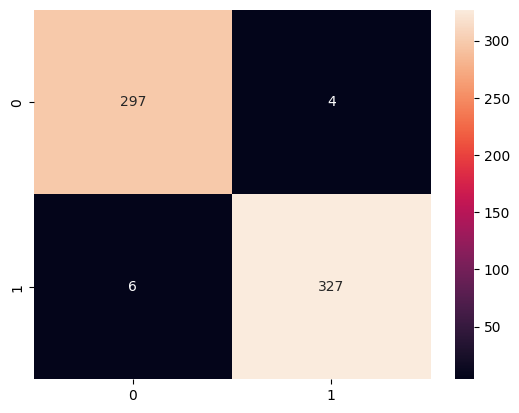

In [28]:
sns.heatmap(cm,annot= True, fmt='d', cmap='rocket')

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       301
           1       0.99      0.98      0.98       333

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



In [30]:


TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

# print classification accuracy
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

# print classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

# print precision score
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

#print recall score
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

#true positive rate
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))


#false positive rate
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

#Specificity
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))



Classification accuracy : 0.9842
Classification error : 0.0158
Precision : 0.9867
Recall or Sensitivity : 0.9802
True Positive Rate : 0.9802
False Positive Rate : 0.0121
Specificity : 0.9879


In [31]:


!pip install -U scikit-learn
!conda update scikit-learn



  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/8e/45/1d6c34f0a4db820968e35ca872e2a553f4d1015e7437f04128496c046034/scikit_learn-1.3.1-cp38-cp38-win_amd64.whl.metadata
   ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.3 MB 660.6 kB/s eta 0:00:14
   ---------------------------------------- 0.0/9.3 MB 660.6 kB/s eta 0:00:14
   ---------------------------------------- 0.1/9.3 MB 491.5 kB/s eta 0:00:19
   ---------------------------------------- 0.1/9.3 MB 525.1 kB/s eta 0:00:18
    --------------------------------------- 0.1/9.3 MB 481.4 kB/s eta 0:00:19
    --------------------------------------- 0.2/9.3 MB 765.3 kB/s eta 0:00:12
   - -------------------------------------- 0.3/9.3 MB 770.1 kB/s eta 0:00:12
   - -------------------------------------- 0.4/9.3 MB 892.7 kB/s eta 0:00:10
   - -----------------

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Program Files\\Python38\\Lib\\site-packages\\~klearn\\.libs\\msvcp140.dll'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
'conda' is not recognized as an internal or external command,
operable program or batch file.


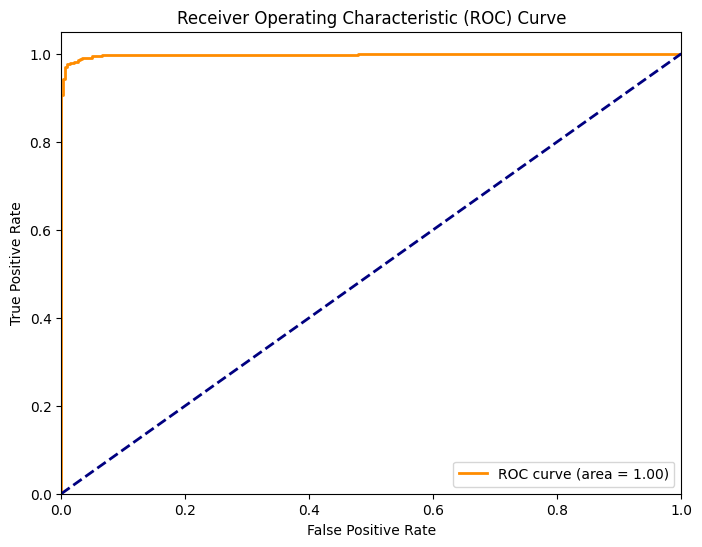

In [32]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you already have your trained SVC model in 'svc', X_test, and y_test

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, svc.decision_function(X_test))
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



In [33]:
 #compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9843


In [34]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(linear_svc, X_train, y_train, cv=10, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.9919


# K-FOLD CROSS VALIDATION

In [35]:
from sklearn.model_selection import KFold


kfold=KFold(n_splits=5, shuffle=True, random_state=0)


linear_svc=SVC(kernel='linear')


linear_scores = cross_val_score(linear_svc, X, y, cv=kfold)
# print cross-validation scores with linear kernel

print('Stratified cross-validation scores with linear kernel:\n\n{}'.format(linear_scores))
# print average cross-validation score with linear kernel

print('Average stratified cross-validation score with linear kernel:{:.4f}'.format(linear_scores.mean()))

Stratified cross-validation scores with linear kernel:

[0.92744479 0.92113565 0.91798107 0.9178515  0.9178515 ]
Average stratified cross-validation score with linear kernel:0.9205


In [36]:
rbf_svc=SVC(kernel='rbf')

rbf_scores = cross_val_score(rbf_svc, X, y, cv=kfold)

# print cross-validation scores with rbf kernel
print('Stratified Cross-validation scores with rbf kernel:\n\n{}'.format(rbf_scores))

# print average cross-validation score with rbf kernel
print('Average stratified cross-validation score with rbf kernel:{:.4f}'.format(rbf_scores.mean()))

Stratified Cross-validation scores with rbf kernel:

[0.67981073 0.70820189 0.65457413 0.66824645 0.65244866]
Average stratified cross-validation score with rbf kernel:0.6727


In [37]:
# instantiate classifier with default hyperparameters with kernel=rbf, C=1.0 and gamma=auto
svc=SVC() 



# declare parameters for hyperparameter tuning
parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]} 
              ]


grid_search = GridSearchCV(estimator = svc,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)
# examine the best model

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'degree': [2, 3, 4],
                          'gamma': [0.01, 0.02, 0.03, 0.04, 0.05],
                          'kernel': ['poly']}],
             scoring='accuracy')

In [38]:
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))


# print parameters that give the best results
print('Parameters that give the best results :', (grid_search.best_params_))


# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :', (grid_search.best_estimator_))

# calculate GridSearch CV score on test set

print('\nGridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV best score : 0.9850


Parameters that give the best results : {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


Estimator that was chosen by the search : SVC(C=10, gamma=0.1)

GridSearch CV score on test set: 0.9842


# LANGUAGE IDENTIFICATION

In [41]:
!pip install keras

  Obtaining dependency information for keras from https://files.pythonhosted.org/packages/2e/f3/19da7511b45e80216cbbd9467137b2d28919c58ba1ccb971435cb631e470/keras-2.13.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
    --------------------------------------- 0.0/1.7 MB 279.3 kB/s eta 0:00:06
   - -------------------------------------- 0.1/1.7 MB 326.1 kB/s eta 0:00:06
   - -------------------------------------- 0.1/1.7 MB 326.8 kB/s eta 0:00:05
   -- ------------------------------------- 0.1/1.7 MB 327.7 kB/s eta 0:00:05
   -- ------------------------------------- 0.1/1.7 MB 363.1 kB/s eta 0:00:05
   -- ------------------------------------- 0.1/1.7 MB 343.4 kB/s eta 0:00:05
   --- ------------------------------------ 0.1/1.7 MB 340.5 kB/s eta 0:00:05
   ---- ----------------------------------- 0.2/1.7


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
!pip install tensorflow

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
replit 3.3.1 requires typing_extensions<4.0.0,>=3.7.4, but you have typing-extensions 4.5.0 which is incompatible.
streamlit 1.21.0 requires protobuf<4,>=3.12, but you have protobuf 4.24.2 which is incompatible.

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/fb/59/3eb58629e3749d9f4fc1e522487af369f9bd4c451f465d3054961fab6bf8/tensorflow-2.13.1-cp38-cp38-win_amd64.whl.metadata
INFO: pip is looking at multiple versions of tensorflow to determine which version is compatible with other requirements. This could take a while.
  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/5b/6f/8b125d126d54061c0be610b135aaf2f8960f55c2e185ac32445e4a5012d5/tensorflow-2.13.0-cp38-cp38-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.13.0 from https://files.pythonhosted.org/packages/38/ba/dd4d998a852451e98dc009ecb208bbb0eeb0c8252dc35b7c4e1050762b36/tensorflow_intel-2.13.0-cp38-cp38-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.w

In [45]:
!pip install librosa

  Obtaining dependency information for librosa from https://files.pythonhosted.org/packages/e2/a2/4f639c1168d7aada749a896afb4892a831e2041bebdcf636aebfe9e86556/librosa-0.10.1-py3-none-any.whl.metadata
  Obtaining dependency information for audioread>=2.1.9 from https://files.pythonhosted.org/packages/57/8d/30aa32745af16af0a9a650115fbe81bde7c610ed5c21b381fca0196f3a7f/audioread-3.0.1-py3-none-any.whl.metadata
  Obtaining dependency information for numba>=0.51.0 from https://files.pythonhosted.org/packages/ce/76/9266f7bd78f134f6ae09886d87675a8ac34e8dd0a30f6007794da41d8a80/numba-0.58.1-cp38-cp38-win_amd64.whl.metadata
     ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
     - -------------------------------------- 0.0/1.0 MB 1.4 MB/s eta 0:00:01
     - -------------------------------------- 0.0/1.0 MB 1.4 MB/s eta 0:00:01
     -- ------------------------------------- 0.1/1.0 MB 550.5 kB/s eta 0:00:02
     ---- ----------------------------------- 0.1/1.0 MB 602.4 kB/s eta 


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [46]:


from keras.models import Model
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, RepeatVector, Reshape, Concatenate, UpSampling2D
import numpy as np
import librosa
import os
from sklearn.model_selection import train_test_split



In [50]:
def batch_generator(for_train, batch_size):
    while True:
        if for_train is True:
            idx = np.random.randint(0, paths_train.shape[0], batch_size)
        else:
            idx = np.random.randint(0, paths_valid.shape[0], batch_size)
            
        x = np.zeros((batch_size, 39, 1001, 1))
        y = np.zeros((batch_size, 3))
        for i in range(batch_size):
            if for_train is True:
                audio, sr = librosa.load(paths_train[idx[i]], sr=16000)
                y[i] = y_train[idx[i]]
            else:
                audio, sr = librosa.load(paths_valid[idx[i]], sr=16000)
                y[i] = y_valid[idx[i]]
                
            mfcc = librosa.feature.mfcc(audio, sr=sr, n_mfcc=40, hop_length=int(0.010*sr), n_fft=int(0.025*sr))
            if mfcc.shape[1] < 1001:
                mfcc = np.concatenate((mfcc, np.zeros((mfcc.shape[0], 1001-mfcc.shape[1]))), axis=1)
            else:
                mfcc = mfcc[:, 0:1001]
            x[i, :, :, 0] = mfcc[1:]
            
        yield x, y

In [51]:
input = Input(shape=(39, 1001, 1))

In [52]:
temp = Conv2D(24, (6, 6), activation='relu')(input)
temp = AveragePooling2D((2,2))(temp)
temp = Conv2D(24, (6, 6), activation='relu')(temp)
temp = AveragePooling2D((2,2))(temp)
temp = Conv2D(24, (6, 6), activation='relu')(temp)
temp = AveragePooling2D((1,141))(temp)
output = Dense((3), activation='softmax')(temp)
output = Reshape((3,))(output)
print(output)

KerasTensor(type_spec=TensorSpec(shape=(None, 3), dtype=tf.float32, name=None), name='reshape/Reshape:0', description="created by layer 'reshape'")


In [53]:
model = Model(inputs=input, outputs=output)
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [54]:


train_gen = batch_generator(True, batch_size=128)
valid_gen = batch_generator(False, batch_size=128)



In [57]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [58]:
df=pd.read_csv(r"C:\Users\LENOVO\Downloads\Language Detection.csv")
df.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [59]:
df.isnull().sum()

Text        0
Language    0
dtype: int64

In [60]:
df['Language'].value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

In [62]:
x = np.array(df["Text"])
y = np.array(df["Language"])

cv = CountVectorizer()
X = cv.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33,random_state=42)

In [63]:


model = MultinomialNB()
model.fit(X_train,y_train)



MultinomialNB()

In [64]:


model.score(X_test,y_test)



0.977725674091442